# Template Matching

Similarity Metrics for Template Matching:
- SSD
- SAD
- NCC

<a>
  <img src="../images/matching_metrices.png" alt="Pinhole camera" width="500" >
</a>

# Feature & Descriptor Matching

Im letzten Abschnitt wurde erklärt, dass die Epipolare Geometrie einen gemeinsamen Punkt braucht, 
auf den sich beide Kameras beziehen können. Dies ist für charakteristische Punkte im Bild einfacher 
als für einfarbige Ausschnitte (z. B. vom Himmel). 

Auch ohne die epipolare Geometrie ist es wünschenswert, charakteristische Punkte in einem Bild 
erkennen zu können. Dies ist allerdings sehr schwierig, da sich Bilder in ihrer `Skalierung`, der `Rotation`, der `Helligkeit` und dem `Betrachtungswinkel` unterscheiden können.

Eine Feature-Point-Methode muss deswegen Features finden und sie beschreiben können. Das Finden 
bedeutet, dass in einem Bild ein besonders charakteristischer Punkt gesucht werden muss, der dann 
als Feature Point bezeichnet wird. Das Beschreiben bedeutet, dass ein Deskriptor des gefundenen 
Features erstellt werden muss, um dazu passende Punkte präzise zu erkennen. Um diese Punkte zu 
finden, gibt es viele verschiedene Möglichkeiten, hier soll es aber vor allem um die SIFT-Methode gehen.


### Skalierungsinvarianz

Ein weiteres Problem ist die Skalierungs-Invarianz: Auf kleinen Strukturen in einem Bild (teils nur 
wenige Pixel groß) ist die Auflösung eines 
potentiellen PoI wesentlich kleiner als bei 
einem größeren Bild. Bei unterschiedlicher 
Skalierung kann nun der PoI an einer 
wesentlich anderen Stelle zu finden sein. 
Um diesen Problem zu entgehen, nutzt 
man das Downsizen, um ein größeres Bild 
im selben Detailgrad darstellen zu können.

Beide Operationen (Gauß-Filter und Rescaling) können beliebig miteinander vertauscht werden, sie 
liefern praktisch und mathematisch die selben Ergebnisse unabhängig von der Reihenfolge der 
Operatoren. 

### Beleuchtungsinvarianz
Um zuverlässig Features (wieder-)zu erkennen, muss die Methode in mehrerlei Hinsicht invariant sein: 
Zunächst muss sie Beleuchtungs-Invariant sein, also nicht von dem absoluten, sondern dem relativen 
Grauwertunterschied abhängen. Um dies sicherzustellen, kann die LoG-Maske verwendet 

## Scale Space

Der Scale Space ist ein zentrales Konzept in der Bildverarbeitung und insbesondere in der Merkmalserkennung (z. B. SIFT, LoG, Canny). Es beschreibt die Darstellung eines Bildes auf verschiedenen Skalen (σ), also mit unterschiedlicher Detailtiefe.

⸻

🧠 Idee hinter dem Scale Space

Ein Bild enthält Informationen auf verschiedenen Skalen:
- Feine Details (z. B. Haare, Texturen),
- grobe Strukturen (z. B. Kanten großer Objekte).

Je nach Anwendungsfall (z. B. Objekterkennung, Kantendetektion) ist eine Skalierung der Bildinhalte sinnvoll, um Skalierungsinvarianz oder Rauschunterdrückung zu erreichen.

⸻

📐 Wie wird der Scale Space erzeugt?

Durch Anwendung eines Gaussian Blur mit unterschiedlichen σ-Werten (Standardabweichungen):

$L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)$
- $G(x, y, \sigma)$: Gauß-Kernel mit Skala σ
- $I(x, y)$: Originalbild
- $*$: Faltung

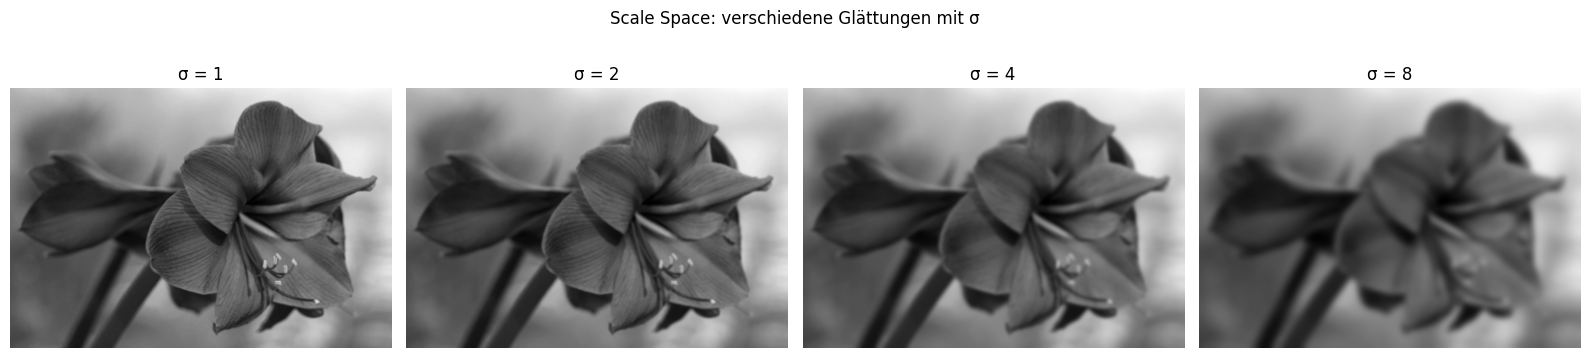

In [6]:
import cv2
import matplotlib.pyplot as plt

bild = cv2.imread('../images/flower.jpg', cv2.IMREAD_GRAYSCALE)

sigmas = [1, 2, 4, 8]
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, sigma in enumerate(sigmas):
    blurred = cv2.GaussianBlur(bild, (0, 0), sigma)
    axs[i].imshow(blurred, cmap='gray')
    axs[i].set_title(f"σ = {sigma}")
    axs[i].axis('off')

plt.suptitle("Scale Space: verschiedene Glättungen mit σ")
plt.tight_layout()
plt.show()

## SIFT: Scale-invariant feature transform

🧠 Was ist SIFT?

SIFT erkennt lokale Merkmale (Keypoints) in Bildern und beschreibt sie so, dass sie:
- Skaleninvariant (Objekte in unterschiedlicher Größe),
- Rotationsinvariant (Objekte in unterschiedlicher Orientierung),
- teilweise affininvariant (Verzerrung durch Perspektive)
sind.

⸻

🔍 Schritte im SIFT-Algorithmus
1.	Scale-Space-Erstellung: Erzeuge mehrere Versionen des Bildes mit verschiedenen σ durch Gaussian Blur.
2.	Difference of Gaussian (DoG): Subtrahiere benachbarte Skalen → hebt Kanten/Blobs hervor.
3.	Extrema-Erkennung: Finde Maxima/Minima im DoG in 3×3×3 Nachbarschaft (Raum + Skala).
4.	Keypoint-Lokalisierung: Filtere instabile Punkte durch Kontrast & Kantenantwort.
5.	Orientierung berechnen: Weise jedem Keypoint eine Hauptorientierung zu (Gradientenrichtung in lokaler Nachbarschaft).
6.	Descriptors berechnen: Für jede Orientierung und Nachbarschaft berechne 128-dimensionale Deskriptoren aus Gradientenhistogrammen.

In [7]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


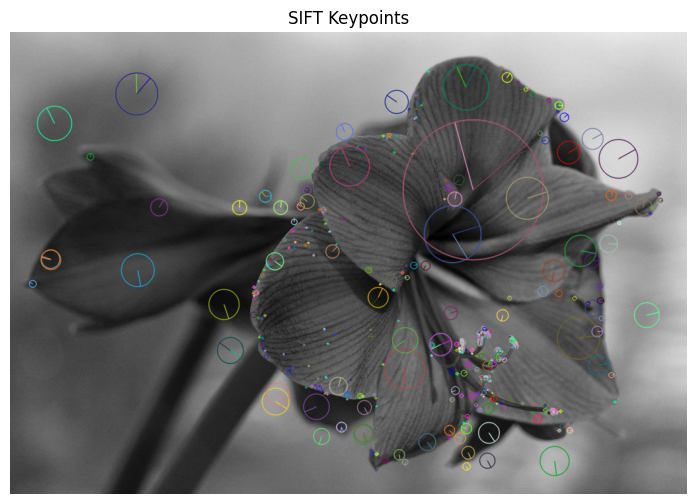

In [8]:
import cv2
import matplotlib.pyplot as plt

# Bild laden (Graustufen)
bild = cv2.imread("../images/flower.jpg", cv2.IMREAD_GRAYSCALE)

# SIFT-Objekt erstellen
sift = cv2.SIFT_create()

# Keypoints und Deskriptoren finden
keypoints, descriptors = sift.detectAndCompute(bild, None)

# Keypoints im Bild darstellen
bild_mit_kp = cv2.drawKeypoints(bild, keypoints, None,
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Anzeigen
plt.figure(figsize=(10, 6))
plt.imshow(bild_mit_kp, cmap='gray')
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()